# USGS Earthquake

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import CSV file:

In [2]:
# Load Dataset
df = pd.read_csv("earthquake_2015_2025.csv")

# Look at first 5 rows
df.head()


,time,latitude,longitude,depth,mag,magType,id,place
0,2015-01-01 23:55:41.830,35.959500,-117.743167,-1.203,2.51,ml,ci37300904,"15km E of Little Lake, CA"
1,2015-01-01 23:49:49.165,41.849500,-119.627500,6.100,0.50,ml,nn00475017,"43 km E of Fort Bidwell, California"
2,2015-01-01 23:45:15.725,60.316700,-151.052100,63.800,1.60,ml,ak01521hzuc,"12 km E of Kasilof, Alaska"
3,2015-01-01 23:43:47.340,38.807499,-122.815498,3.765,0.87,md,nc72373751,"8 km WSW of Cobb, California"
4,2015-01-01 23:39:47.370,-19.944800,-70.988500,14.200,4.20,mwr,usc000tb79,"92 km WNW of Iquique, Chile"


In [3]:
df.tail()

,time,latitude,longitude,depth,mag,magType,id,place
1625313,2025-04-18 00:10:18.241,-23.4884,-68.0786,129.24,5.6,mb,us6000q6xh,"65 km S of San Pedro de Atacama, Chile"
1625314,2025-04-18 00:09:21.599,39.1303,-119.0443,6.60,1.2,ml,nn00896391,"19 km NNE of Yerington, Nevada"
1625315,2025-04-18 00:06:00.087,54.4302,-160.4684,25.60,2.2,ml,ak0254ym2rmw,"100 km S of Sand Point, Alaska"
1625316,2025-04-18 00:02:02.055,63.1281,-151.4256,3.00,1.3,ml,ak0254ym1wzo,"48 km SSE of Denali National Park, Alaska"
1625317,2025-04-18 00:01:58.362,-6.2537,151.4486,10.00,4.8,mww,us6000q6xg,"164 km ESE of Kimbe, Papua New Guinea"


## Before Cleaning Data:

In [4]:
df.shape, df.columns

((1625318, 8),
 Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'id',
        'place'],
       dtype='object'))

In [5]:
df.isnull().sum()

time           0
latitude       0
longitude      0
depth          1
mag          911
magType      913
id             0
place          0
dtype: int64

In [6]:
df.describe()

,latitude,longitude,depth,mag
count,1.625318e+06,1.625318e+06,1.625317e+06,1.624407e+06
mean,3.931740e+01,-1.138100e+02,2.355022e+01,1.621999e+00
std,2.009716e+01,6.816391e+01,5.498230e+01,1.234549e+00
min,-8.288370e+01,-1.799997e+02,-1.000000e+01,-9.990000e+00
25%,3.367317e+01,-1.512289e+02,3.290000e+00,8.200000e-01
50%,3.866070e+01,-1.218937e+02,8.100000e+00,1.390000e+00
75%,5.490740e+01,-1.164678e+02,1.653000e+01,2.100000e+00
max,8.738600e+01,1.799994e+02,6.863900e+02,8.300000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625318 entries, 0 to 1625317
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   time       1625318 non-null  object 
 1   latitude   1625318 non-null  float64
 2   longitude  1625318 non-null  float64
 3   depth      1625317 non-null  float64
 4   mag        1624407 non-null  float64
 5   magType    1624405 non-null  object 
 6   id         1625318 non-null  object 
 7   place      1625318 non-null  object 
dtypes: float64(4), object(4)
memory usage: 99.2+ MB


In [8]:
df.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
magType       object
id            object
place         object
dtype: object

In [9]:
print(df["time"].head())
print(df["time"].dtype)

0    2015-01-01 23:55:41.830
1    2015-01-01 23:49:49.165
2    2015-01-01 23:45:15.725
3    2015-01-01 23:43:47.340
4    2015-01-01 23:39:47.370
Name: time, dtype: object
object


# Cleaning Data:

In [10]:
# Converts time to datetime
df["time"] = pd.to_datetime(df["time"], errors="coerce")
#errors="coerce" means--> If a value cannot be converted to datetime, it will be replaced with NaT

In [11]:
print(df["time"].head())
print(df["time"].dtype)

0   2015-01-01 23:55:41.830
1   2015-01-01 23:49:49.165
2   2015-01-01 23:45:15.725
3   2015-01-01 23:43:47.340
4   2015-01-01 23:39:47.370
Name: time, dtype: datetime64[ns]
datetime64[ns]


In [12]:
# Drop rows with missing values
df = df.dropna(subset=["depth", "mag", "longitude", "latitude"])

# Fill missing 'magType' with 'unknown'
df["magType"] = df["magType"].fillna("unknown")

In [13]:
df.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
id           0
place        0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Reset index
df = df.reset_index(drop=True)

In [16]:
df.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
depth               float64
mag                 float64
magType              object
id                   object
place                object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624406 entries, 0 to 1624405
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   time       1624406 non-null  datetime64[ns]
 1   latitude   1624406 non-null  float64       
 2   longitude  1624406 non-null  float64       
 3   depth      1624406 non-null  float64       
 4   mag        1624406 non-null  float64       
 5   magType    1624406 non-null  object        
 6   id         1624406 non-null  object        
 7   place      1624406 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 99.1+ MB


In [18]:
df.describe()

,time,latitude,longitude,depth,mag
count,1624406,1.624406e+06,1.624406e+06,1.624406e+06,1.624406e+06
mean,2020-04-06 12:55:35.238441984,3.931781e+01,-1.138064e+02,2.356140e+01,1.622000e+00
min,2015-01-01 00:05:41.425000,-8.288370e+01,-1.799997e+02,-1.000000e+01,-9.990000e+00
25%,2018-02-19 19:24:24.434749952,3.367185e+01,-1.512326e+02,3.290000e+00,8.200000e-01
50%,2020-04-06 01:39:44.975000064,3.865750e+01,-1.218854e+02,8.110000e+00,1.390000e+00
75%,2022-08-11 01:49:04.252499968,5.492900e+01,-1.164665e+02,1.655000e+01,2.100000e+00
max,2025-04-18 23:56:02.060000,8.738600e+01,1.799994e+02,6.863900e+02,8.300000e+00
std,NaN,2.010260e+01,6.818129e+01,5.499562e+01,1.234549e+00


# Data Visualization:

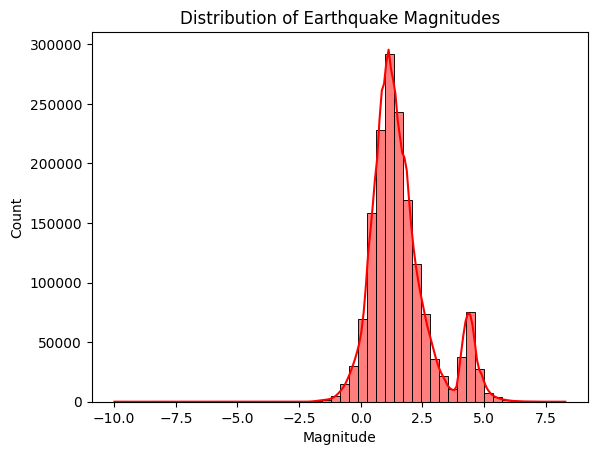

In [19]:
# Distribution of magnitude
sns.histplot(df["mag"], bins=50, kde=True, color="red")
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

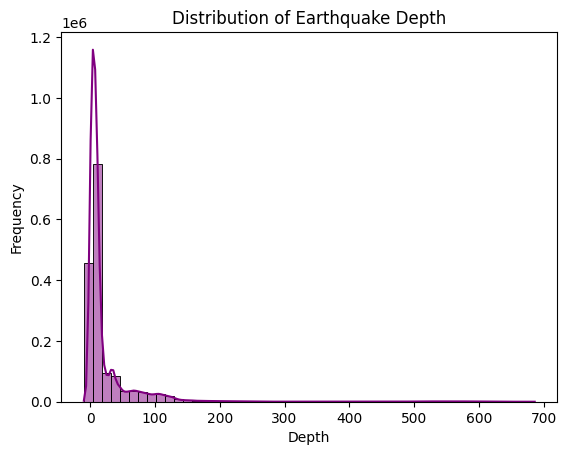

In [20]:
# Distribution of depth
sns.histplot(df["depth"], bins=50, kde=True, color="purple")
plt.title("Distribution of Earthquake Depth")
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.show()

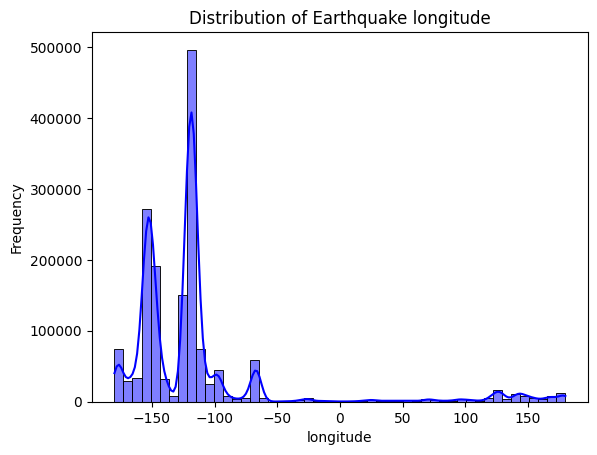

In [21]:
# Distribution of longitude
sns.histplot(df["longitude"], bins=50, kde=True, color="blue")
plt.title("Distribution of Earthquake longitude")
plt.xlabel("longitude")
plt.ylabel("Frequency")
plt.show()

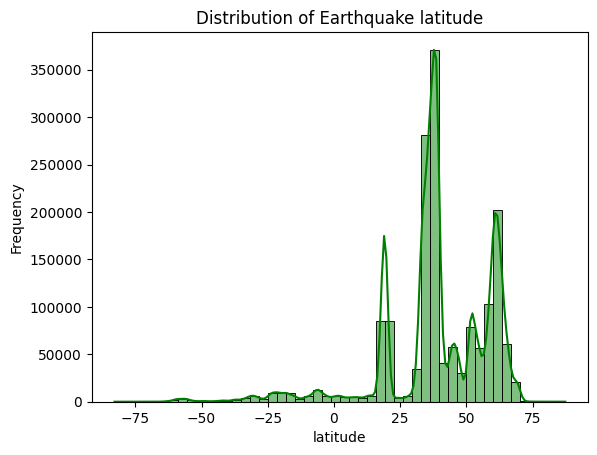

In [22]:
# Distribution of latitude
sns.histplot(df["latitude"], bins=50, kde=True, color="green")
plt.title("Distribution of Earthquake latitude")
plt.xlabel("latitude")
plt.ylabel("Frequency")
plt.show()

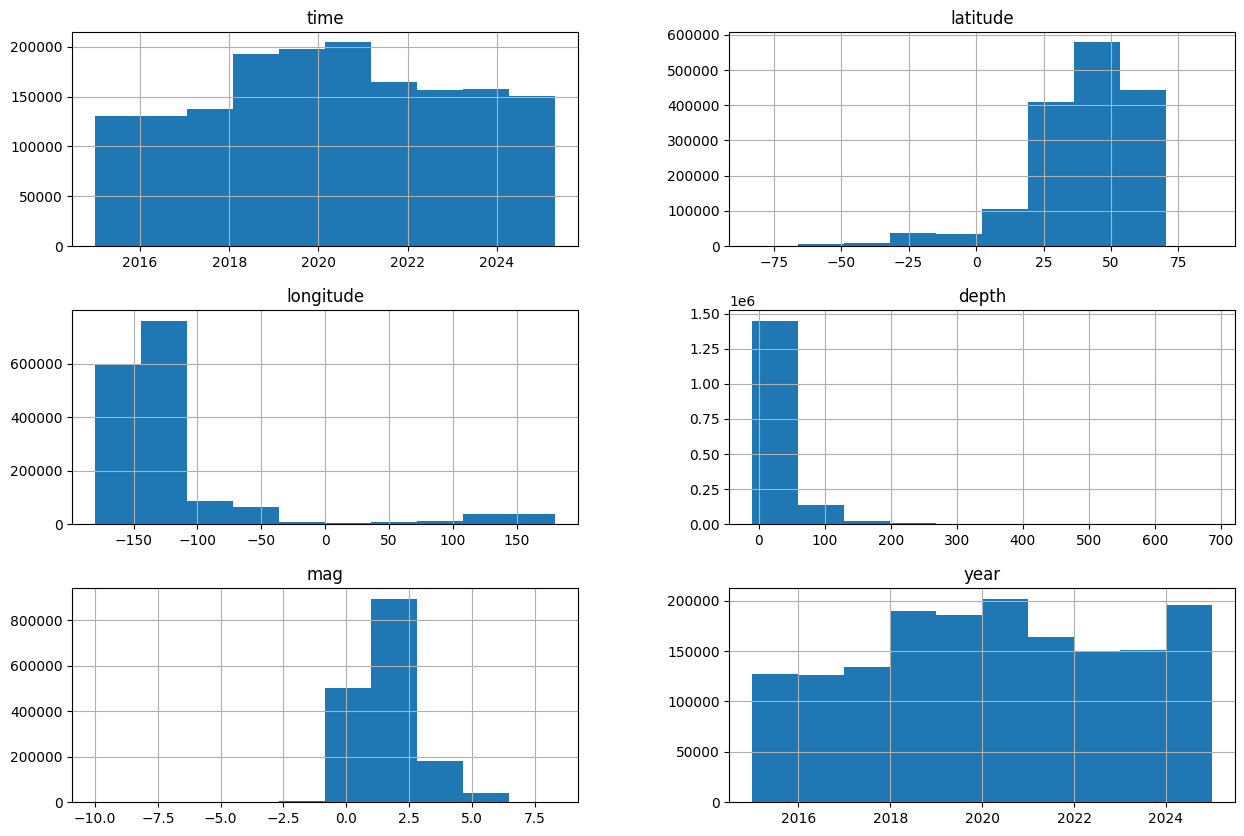

In [51]:
df.hist(figsize=(15,10))
plt.show()

In [23]:
# Group by place and calculate average magnitude
avg_mag_by_place = df.groupby('place')['mag'].mean().reset_index()

# Sort by magnitude descending
avg_mag_by_place = avg_mag_by_place.sort_values(by='mag', ascending=False)

# Show top 10 places with highest average magnitude
print(avg_mag_by_place.head(10))


                                                    place  mag
227104                          78 km NE of Navarro, Peru  8.0
145024             35 km WNW of Panguna, Papua New Guinea  7.9
168481                            45 km S of Levuka, Fiji  7.9
210166                      67 km NNE of Bharatpur, Nepal  7.8
187203                 53 km NNE of Amberley, New Zealand  7.8
117511                       27 km SSE of Muisne, Ecuador  7.8
256532  Pazarcik earthquake, Kahramanmaras earthquake ...  7.8
92492           2025 Mandalay, Burma (Myanmar) Earthquake  7.7
34508                        123 km NNW of Lucea, Jamaica  7.7
163296                         41 km SW of Quellón, Chile  7.6


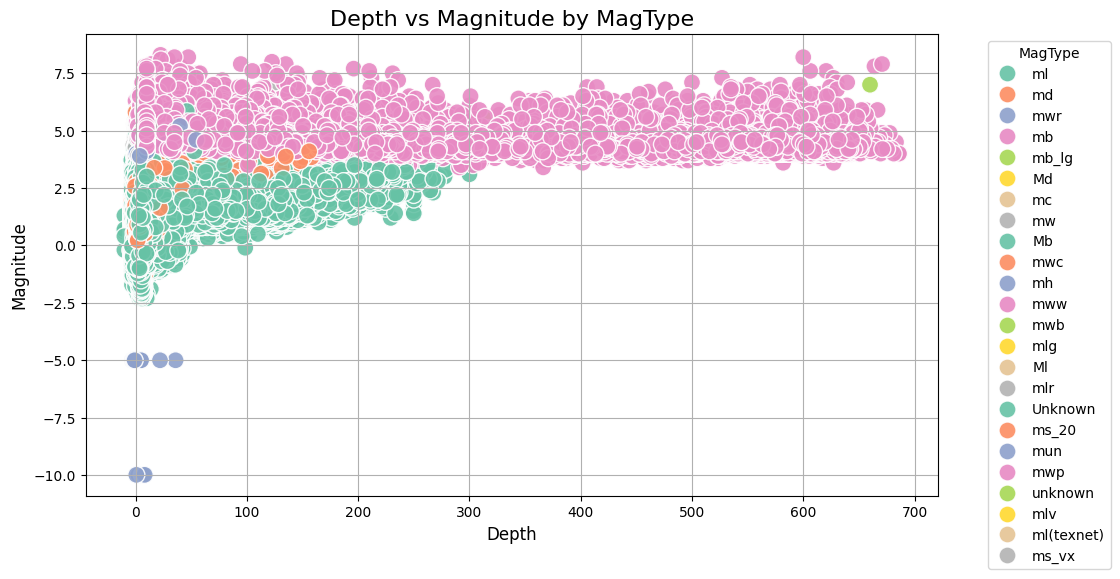

In [24]:
plt.figure(figsize=(11,6))
sns.scatterplot(
    data=df,
    x="depth",
    y="mag",
    hue="magType",   
    alpha=0.9,
    s=150,
    palette="Set2"    
)
plt.title("Depth vs Magnitude by MagType", fontsize=16)
plt.xlabel("Depth", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.legend(title="MagType", bbox_to_anchor=(1.05, 1), loc="upper left")  # move legend outside
plt.grid()
plt.show()

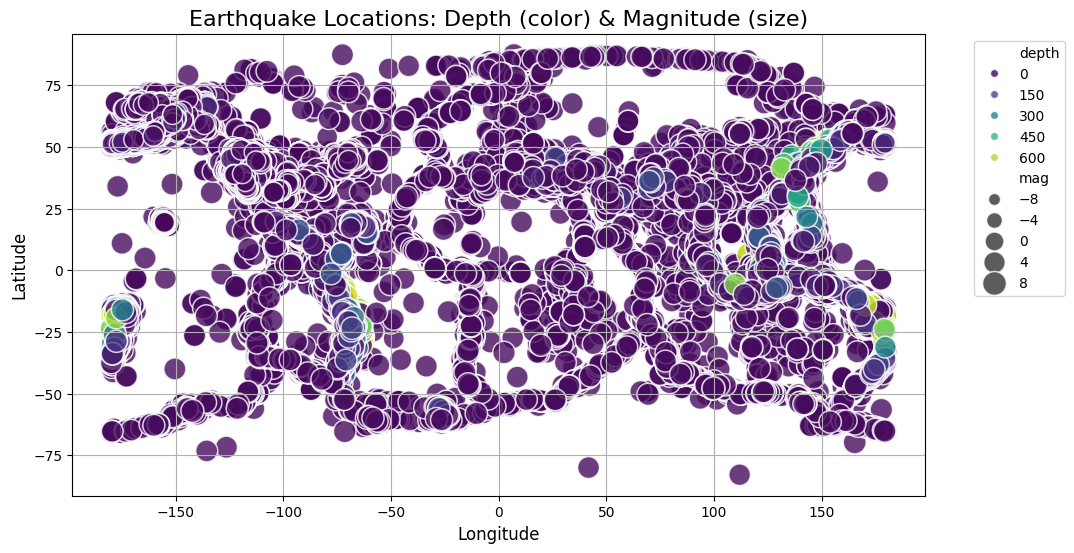

In [25]:
plt.figure(figsize=(11,6))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="depth",        
    size="mag",         
    sizes=(50, 300),   
    palette="viridis",  
    alpha=0.8
)

plt.title("Earthquake Locations: Depth (color) & Magnitude (size)", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # move legend outside
plt.grid()
plt.show()

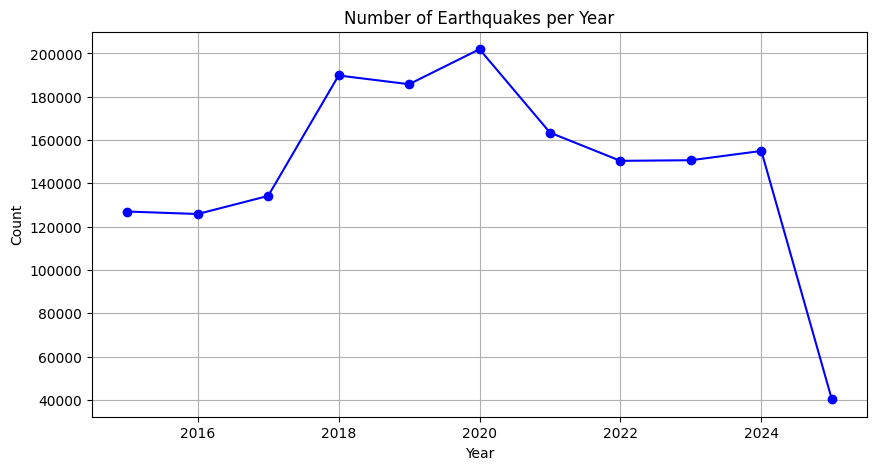

In [26]:
# Extract year
df['year'] = df['time'].dt.year

# Count earthquakes per year
eq_per_year = df.groupby('year')['time'].count()

# visualize
eq_per_year.plot(kind='line', figsize=(10,5), color='blue', marker='o')
plt.title("Number of Earthquakes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_20200\3106392156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette="viridis")


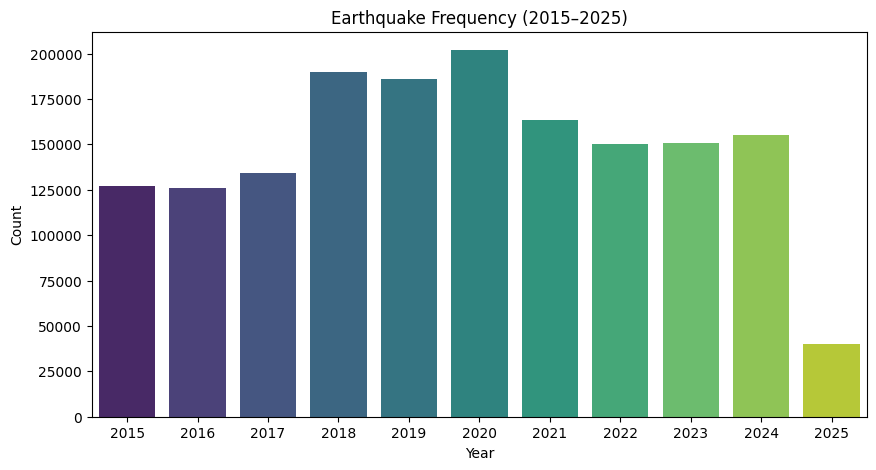

In [27]:
# Earthquake count per year (Histogram)
plt.figure(figsize=(10,5))
sns.countplot(x='year', data=df, palette="viridis")
plt.title("Earthquake Frequency (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Prophet Model

In [32]:
from prophet import Prophet
yearly_quakes = df.groupby('year').size().reset_index(name='count')
# Prepare for Prophet
df_prophet = yearly_quakes.rename(columns={'year':'ds','count':'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Train Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future dataframe up to 2025
future = model.make_future_dataframe(periods=0, freq='Y')  # no future since 2025 is last
forecast = model.predict(future)

# Merge predictions with actual
result = df_prophet.merge(forecast[['ds','yhat']], on='ds')

09:43:47 - cmdstanpy - INFO - Chain [1] start processing
09:43:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


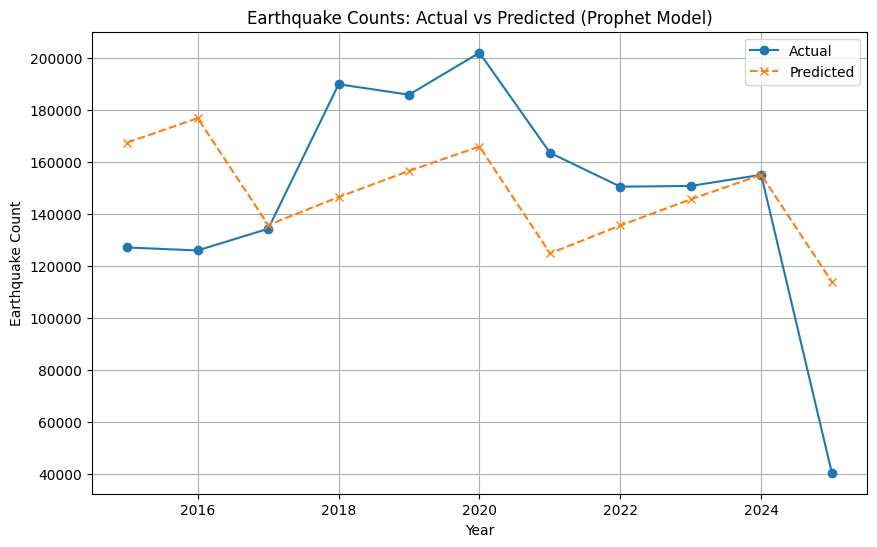

In [33]:
plt.figure(figsize=(10,6))
plt.plot(result['ds'], result['y'], label="Actual", marker="o")
plt.plot(result['ds'], result['yhat'], label="Predicted", marker="x", linestyle="--")

plt.title("Earthquake Counts: Actual vs Predicted (Prophet Model)")
plt.xlabel("Year")
plt.ylabel("Earthquake Count")
plt.legend()
plt.grid()
plt.show()

In [34]:
result['year'] = pd.to_datetime(result['ds']).dt.year

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Assuming your dataframe with actual and predicted is called `result`
# Columns: year | y (actual) | yhat (predicted)

y_true = result['y']
y_pred = result['yhat']

# Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("Prophet Model Performance")
print(f"MAE  = {mae:.2f}")   # average absolute error
print(f"MSE  = {mse:.2f}")   # squared error
print(f"RMSE = {rmse:.2f}")  # error in same scale as data
print(f"R²   = {r2:.2f}")    # 1 = perfect prediction

Prophet Model Performance
MAE  = 30349.77
MSE  = 1402112645.65
RMSE = 37444.79
R²   = 0.19


# Random Forest Model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# Assuming df already has: ['time', 'mag', 'depth', 'latitude', 'longitude']
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

# Group by year (aggregate earthquakes per year, with avg depth/mag as features)
df_yearly = df.groupby('year').agg({
    'mag': 'mean',
    'depth': 'mean',
    'id': 'count'   # earthquake counts
}).reset_index()

df_yearly.rename(columns={'id': 'quake_count'}, inplace=True)

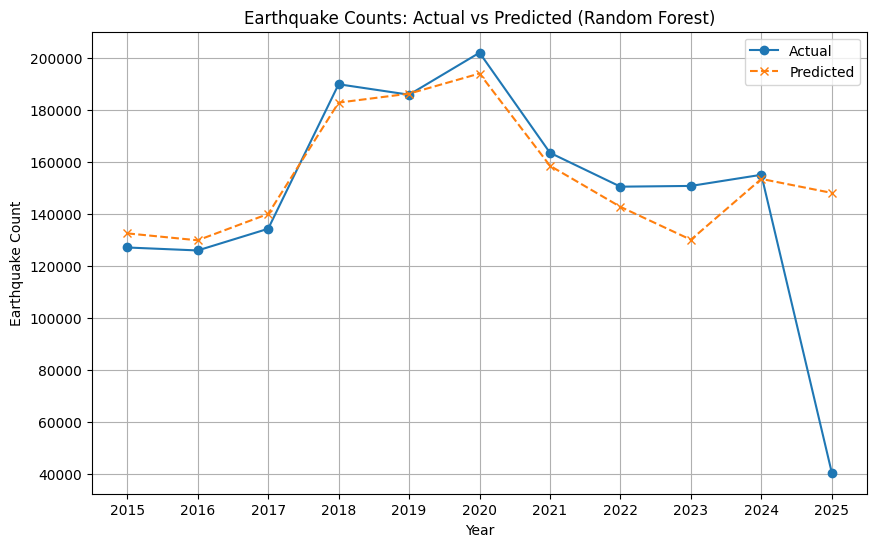

In [38]:
y_pred_all = rf.predict(X)
plt.figure(figsize=(10,6))

# Plot actual for all years
plt.plot(df_yearly['year'], df_yearly['quake_count'], label='Actual', marker='o')

# Plot predicted for test years only
plt.plot(df_yearly['year'], y_pred_all, label='Predicted', marker='x', linestyle="--")

plt.title("Earthquake Counts: Actual vs Predicted (Random Forest)")
plt.xlabel("Year")
plt.ylabel("Earthquake Count")
plt.legend()
plt.grid()

# Set x-axis to show all years as integers
plt.xticks(df_yearly['year'].astype(int))
plt.show()

In [39]:
# Features & Target
# df_yearly should already exist with 'year', 'quake_count', 'mag', 'depth'
X = df_yearly[['mag', 'depth']]
y = df_yearly['quake_count']

# Train-Test Split (time series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")  
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Random Forest Performance:
MAE  = 43326.60
MSE  = 1402112645.65
RMSE = 63313.60
R²   = -0.42


# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
# Features & Target
X = df_yearly[['mag', 'depth']]  # You can also use X = df_yearly[['year']] if you want time-only regression
y = df_yearly['quake_count']

# Train-Test Split (optional for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for all years
y_pred_lr_all = lr.predict(X)

# Evaluate (optional)
mae = mean_absolute_error(y, y_pred_lr_all)
rmse = np.sqrt(mean_squared_error(y, y_pred_lr_all))
r2 = r2_score(y, y_pred_lr_all)
print(f"Linear Regression Performance for all years:\nMAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")

Linear Regression Performance for all years:
MAE=16687.84, RMSE=35972.69, R²=0.25


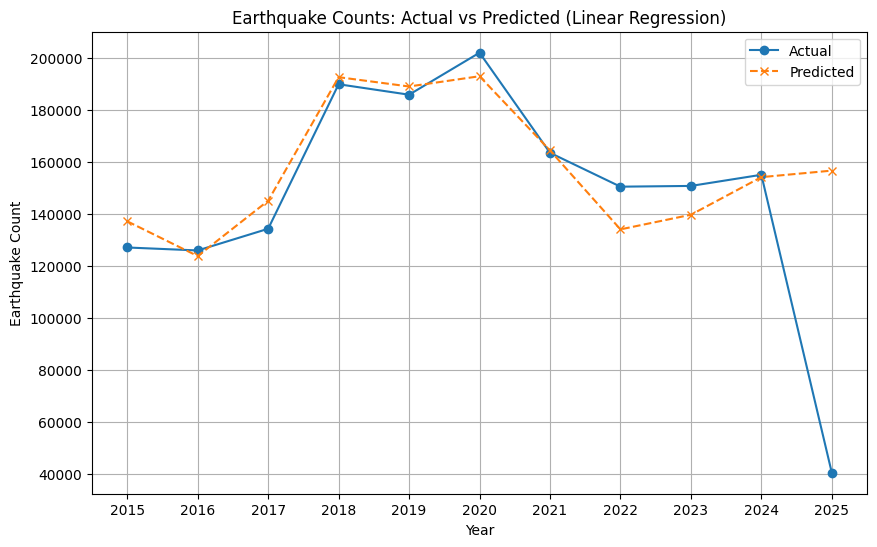

In [41]:
plt.figure(figsize=(10,6))
plt.plot(df_yearly['year'], df_yearly['quake_count'], label='Actual', marker='o')
plt.plot(df_yearly['year'], y_pred_lr_all, label='Predicted', marker='x', linestyle="--")
plt.title("Earthquake Counts: Actual vs Predicted (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Earthquake Count")
plt.legend()
plt.grid()
plt.xticks(df_yearly['year'].astype(int))
plt.show()

# K-Means

Cluster Centers:
      quake_count       mag      depth
0  185247.500000  1.625976  20.934243
1   40313.000000  1.576474  23.757517
2  140517.166667  1.625532  26.023228


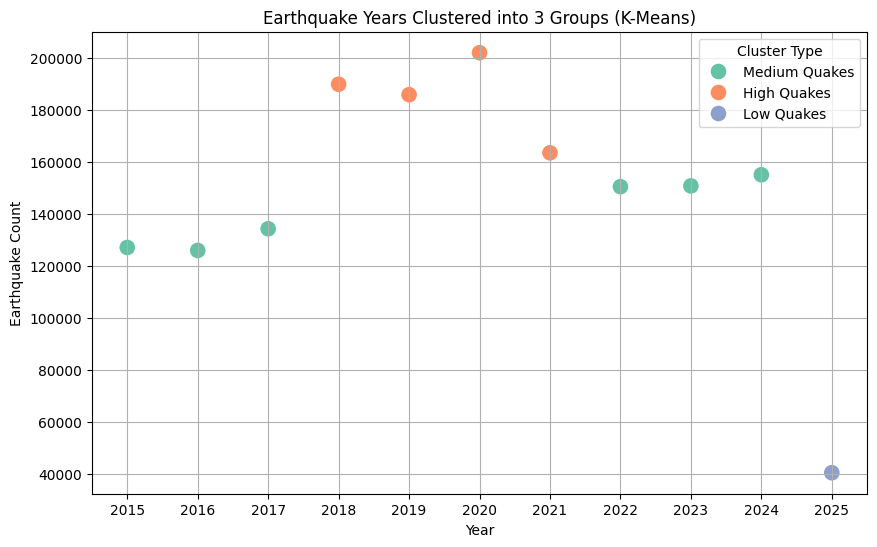

In [46]:
from sklearn.cluster import KMeans

# Features for clustering
X_cluster = df_yearly[['quake_count', 'mag', 'depth']]

# Apply K-Means
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df_yearly['cluster'] = kmeans.fit_predict(X_cluster)

# Cluster centers from K-Means
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['quake_count', 'mag', 'depth'])
print("Cluster Centers:\n", cluster_centers)

# Sort clusters by quake_count to assign descriptive labels
sorted_idx = cluster_centers['quake_count'].argsort()
cluster_labels = ['Low Quakes', 'Medium Quakes', 'High Quakes']
cluster_mapping = {sorted_idx[i]: cluster_labels[i] for i in range(len(cluster_labels))}

# Map cluster numbers to labels
df_yearly['cluster_label'] = df_yearly['cluster'].map(cluster_mapping)

# Plot with descriptive legend
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_yearly,
    x='year',
    y='quake_count',
    hue='cluster_label',
    palette='Set2',
    s=150
)
plt.title(f"Earthquake Years Clustered into {len(cluster_labels)} Groups (K-Means)")
plt.xlabel("Year")
plt.ylabel("Earthquake Count")
plt.grid()
plt.xticks(df_yearly['year'].astype(int))
plt.legend(title='Cluster Type')
plt.show()

# Forecasting

C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


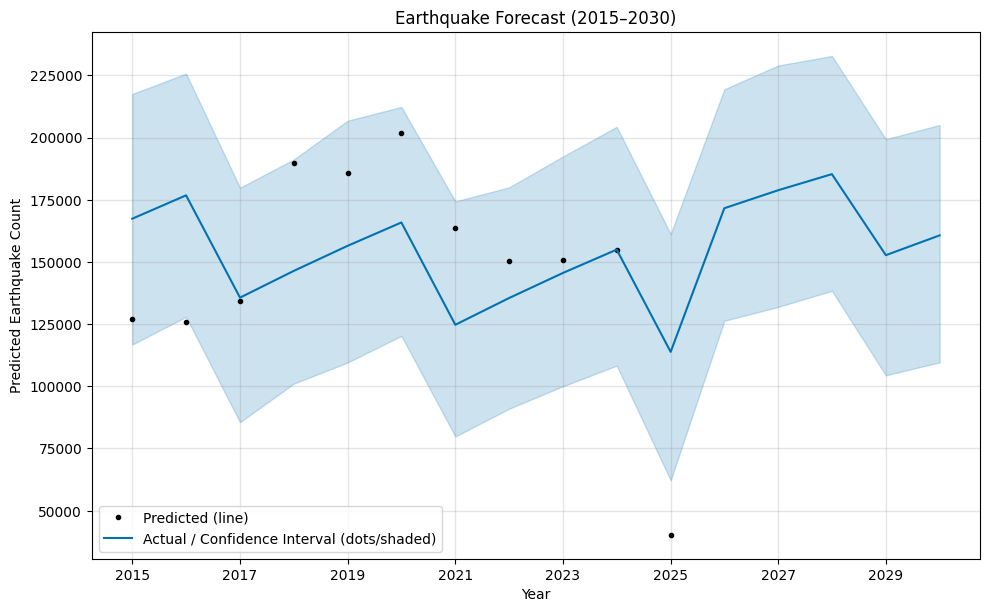

In [50]:
# Make future dataframe for next 5 years beyond 2025
future = model.make_future_dataframe(periods=5, freq='Y')  
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Earthquake Forecast (2015–2030)")
plt.xlabel("Year")
plt.ylabel("Predicted Earthquake Count")
plt.legend(['Predicted (line)', 'Actual / Confidence Interval (dots/shaded)'])
plt.show()